In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("mpg_raw.csv")

In [6]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [9]:
df.shape

(398, 9)

In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [11]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [12]:
df["horsepower"].fillna(df["horsepower"].mean(), inplace = True)

In [13]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

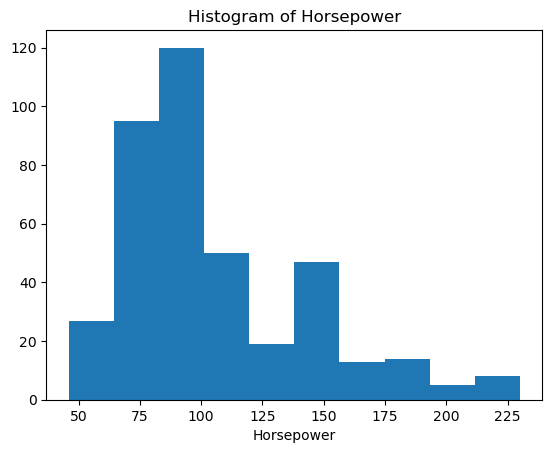

In [14]:
plt.hist(df["horsepower"])
plt.title("Histogram of Horsepower")
plt.xlabel("Horsepower")
plt.show()

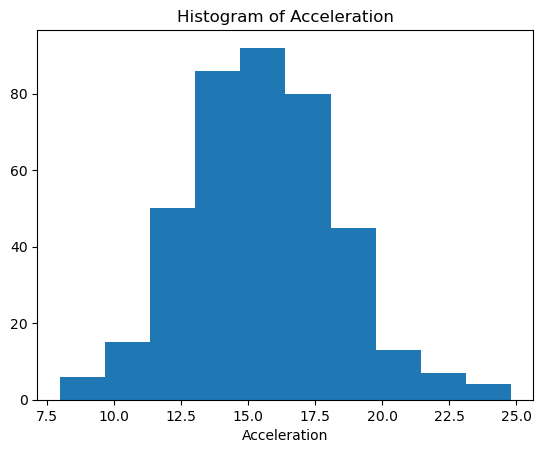

In [15]:
plt.hist(df["acceleration"])
plt.title("Histogram of Acceleration")
plt.xlabel("Acceleration")
plt.show()

In [16]:
num = list(df.select_dtypes(exclude=["object"]).columns)
num

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year']

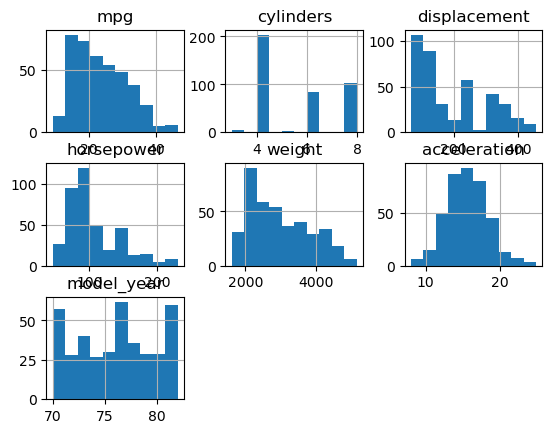

In [17]:
df.hist()
plt.show()

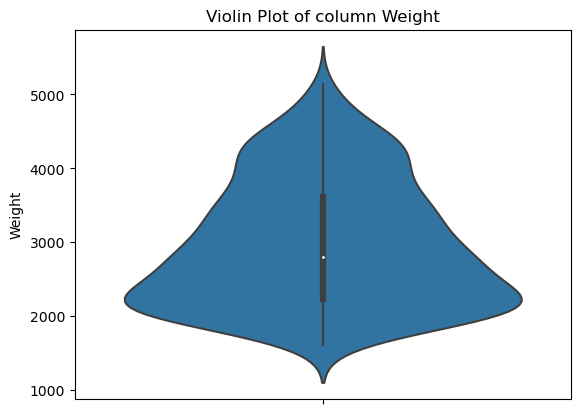

In [18]:
sns.violinplot(y="weight", data=df)
plt.ylabel("Weight")
plt.title("Violin Plot of column Weight")
plt.show()

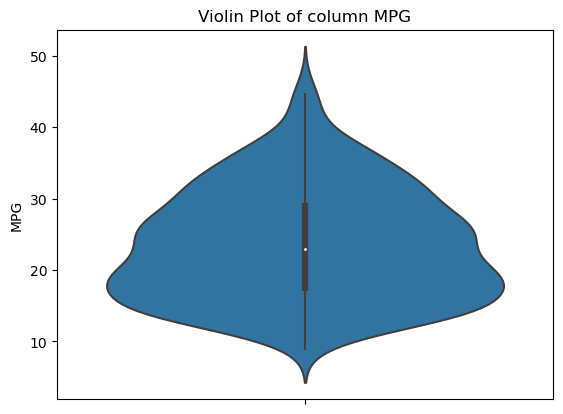

In [19]:
sns.violinplot(y="mpg", data=df)
plt.ylabel("MPG")
plt.title("Violin Plot of column MPG")
plt.show()

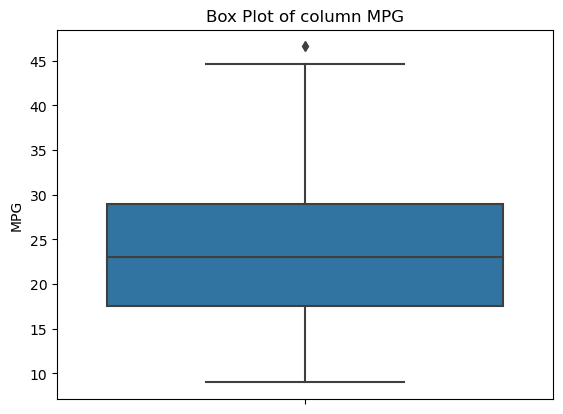

In [20]:
sns.boxplot(y = df["mpg"])
plt.ylabel("MPG")
plt.title("Box Plot of column MPG")
plt.show()

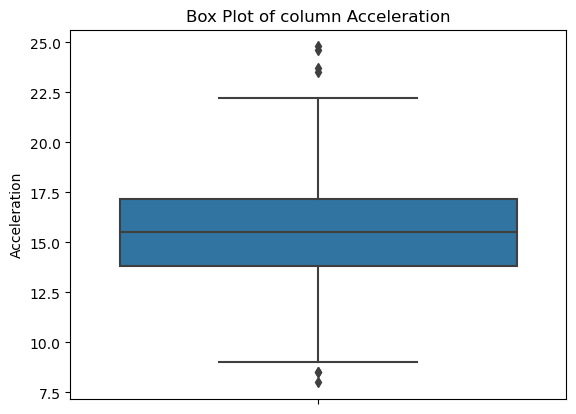

In [21]:
sns.boxplot(y = df["acceleration"])
plt.ylabel("Acceleration")
plt.title("Box Plot of column Acceleration")
plt.show()

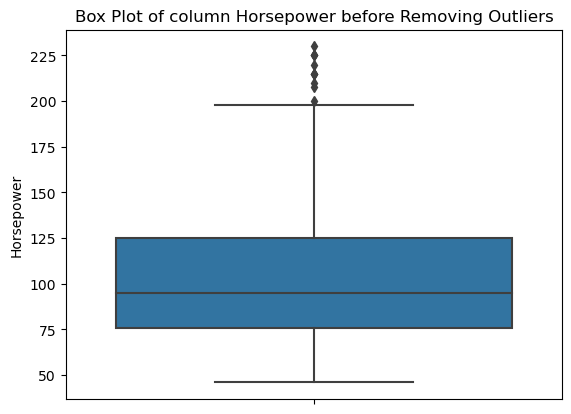

In [22]:
sns.boxplot(y = df["horsepower"])
plt.ylabel("Horsepower")
plt.title("Box Plot of column Horsepower before Removing Outliers")
plt.show()

In [23]:
print(f'Number of rows before removing outliers in Horsepower is {df.shape[0]}')

Number of rows before removing outliers in Horsepower is 398


In [24]:
q1 = df["horsepower"].quantile(0.25)
q3 = df["horsepower"].quantile(0.75)
iqr = q3 - q1
uf = q3 + 1.5*iqr
lf = q1 - 1.5*iqr
print(f'Number of rows containing outliers in Horsepower is {df.shape[0] - df[df["horsepower"] < uf].shape[0]}')

Number of rows containing outliers in Horsepower is 11


In [25]:
df = df[df["horsepower"] < uf]

In [26]:
print(f'Number of rows after removing outliers in Horsepower is {df.shape[0]}')

Number of rows after removing outliers in Horsepower is 387


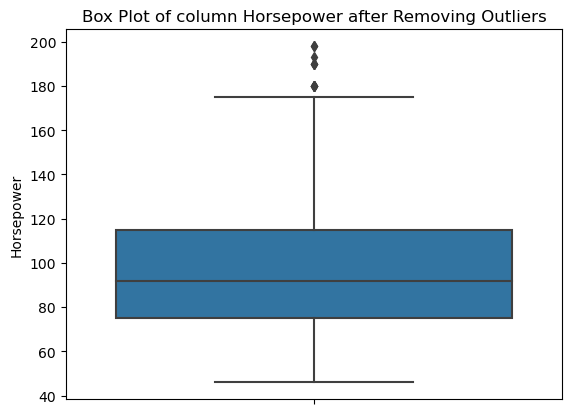

In [27]:
sns.boxplot(y = df["horsepower"])
plt.ylabel("Horsepower")
plt.title("Box Plot of column Horsepower after Removing Outliers")
plt.show()

/tmp/ipykernel_7149/1916048840.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method="spearman"), annot=True, vmin=0, vmax=-1)


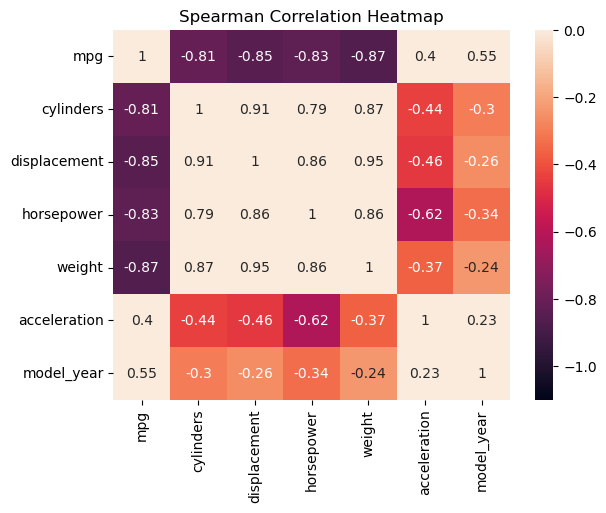

In [28]:
sns.heatmap(df.corr(method="spearman"), annot=True, vmin=0, vmax=-1)
plt.title("Spearman Correlation Heatmap")
plt.show()

In [29]:
df1 = df.copy()

In [30]:
min_max = MinMaxScaler()
df1[num] = min_max.fit_transform(df1[num])

In [31]:
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,0.239362,1.0,0.662050,0.552632,0.536150,0.238095,0.0,usa,chevrolet chevelle malibu
1,0.159574,1.0,0.781163,0.782895,0.589736,0.208333,0.0,usa,buick skylark 320
2,0.239362,1.0,0.692521,0.684211,0.516870,0.178571,0.0,usa,plymouth satellite
3,0.186170,1.0,0.653740,0.684211,0.516019,0.238095,0.0,usa,amc rebel sst
4,0.212766,1.0,0.648199,0.618421,0.520556,0.148810,0.0,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,0.478723,0.2,0.199446,0.263158,0.333711,0.452381,1.0,usa,ford mustang gl
394,0.930851,0.2,0.080332,0.039474,0.146583,0.988095,1.0,europe,vw pickup
395,0.611702,0.2,0.185596,0.250000,0.193365,0.214286,1.0,usa,dodge rampage
396,0.505319,0.2,0.144044,0.217105,0.286929,0.630952,1.0,usa,ford ranger


## Labcycle Program 2

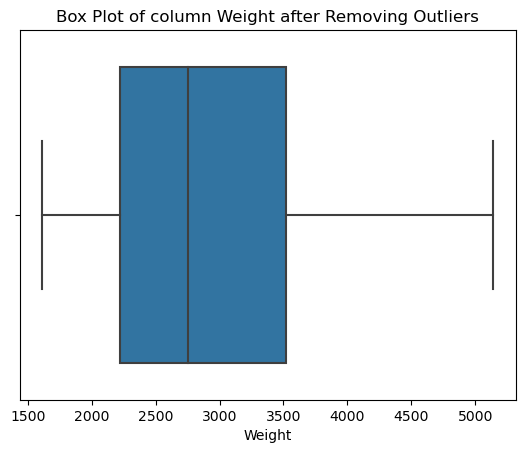

In [32]:
sns.boxplot(x = df["weight"])
plt.xlabel("Weight")
plt.title("Box Plot of column Weight after Removing Outliers")
plt.show()

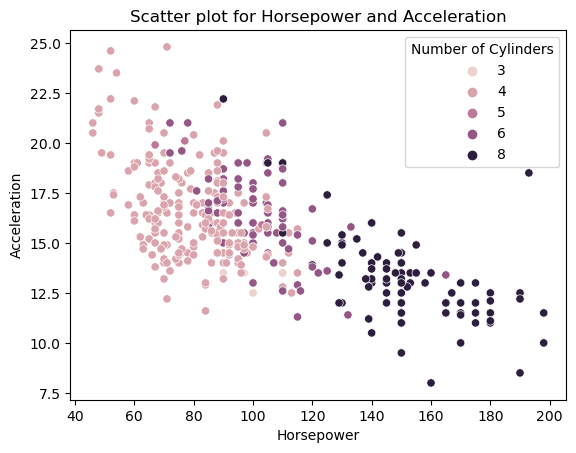

In [33]:
sns.scatterplot(x = "horsepower", y = "acceleration", hue = "cylinders", data = df)
plt.xlabel("Horsepower")
plt.ylabel("Acceleration")
plt.legend(title = "Number of Cylinders")
plt.title("Scatter plot for Horsepower and Acceleration")
plt.show()

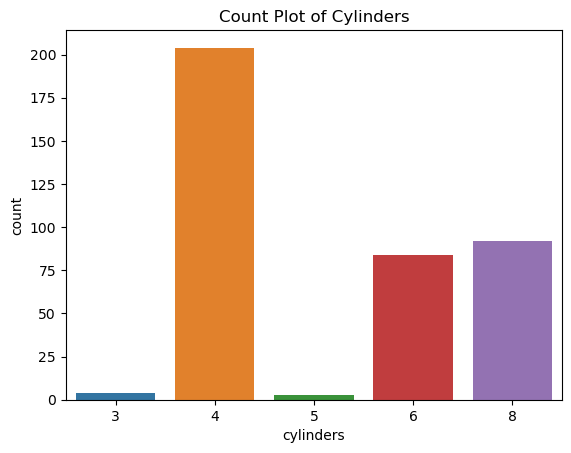

In [34]:
sns.countplot(x = "cylinders", data = df)
plt.title("Count Plot of Cylinders")
plt.show()

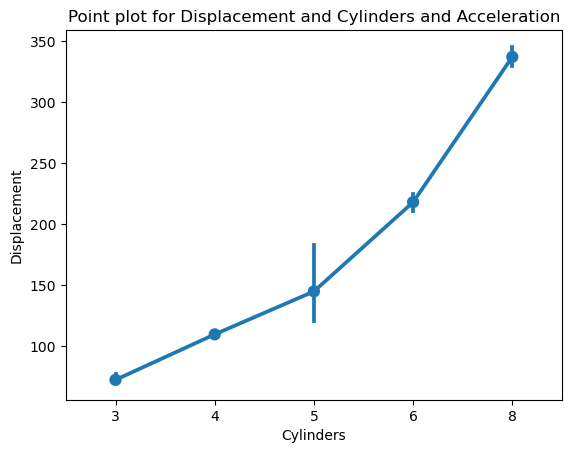

In [35]:
sns.pointplot(x = "cylinders", y = "displacement", data = df)
plt.xlabel("Cylinders")
plt.ylabel("Displacement")
plt.title("Point plot for Displacement and Cylinders and Acceleration")
plt.show()

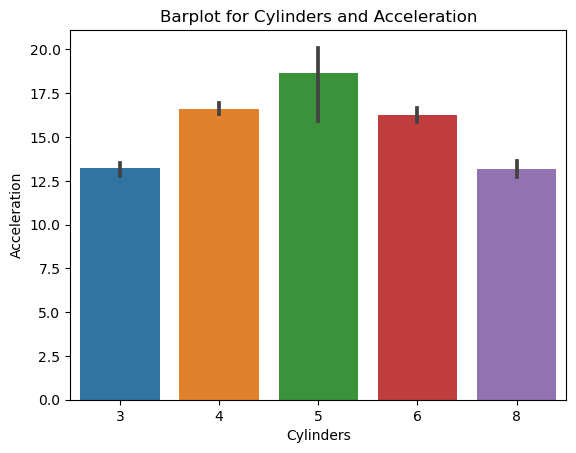

In [36]:
sns.barplot(x = "cylinders", y = "acceleration", data = df)
plt.xlabel("Cylinders")
plt.ylabel("Acceleration")
# plt.legend(title = "Origin")
plt.title("Barplot for Cylinders and Acceleration")
plt.show()

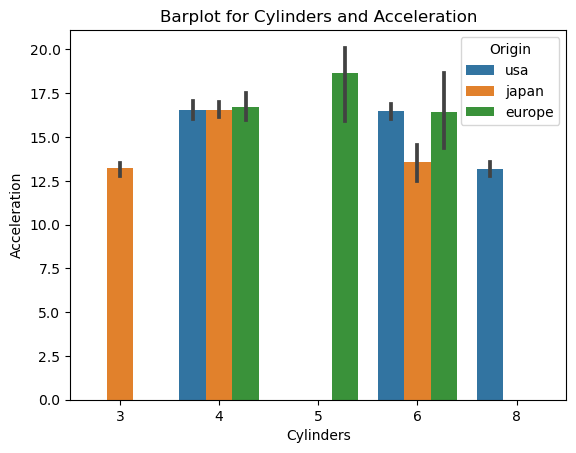

In [37]:
sns.barplot(x = "cylinders", y = "acceleration", hue = "origin", data = df)
plt.xlabel("Cylinders")
plt.ylabel("Acceleration")
plt.legend(title = "Origin")
plt.title("Barplot for Cylinders and Acceleration")
plt.show()

/usr/lib/python3/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


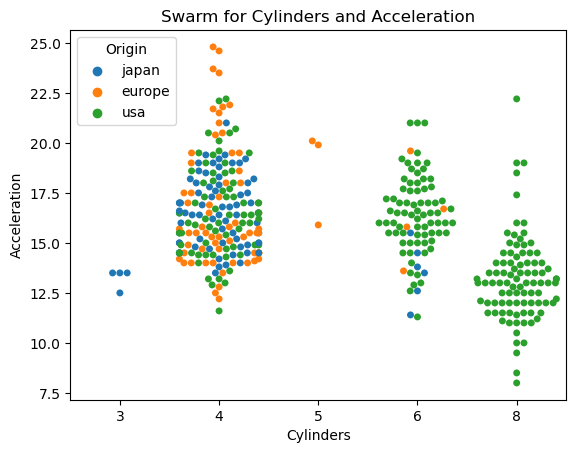

In [38]:
sns.swarmplot(x = "cylinders", y = "acceleration", hue = "origin", data = df)
plt.xlabel("Cylinders")
plt.ylabel("Acceleration")
plt.legend(title = "Origin")
plt.title("Swarm for Cylinders and Acceleration")
plt.show()

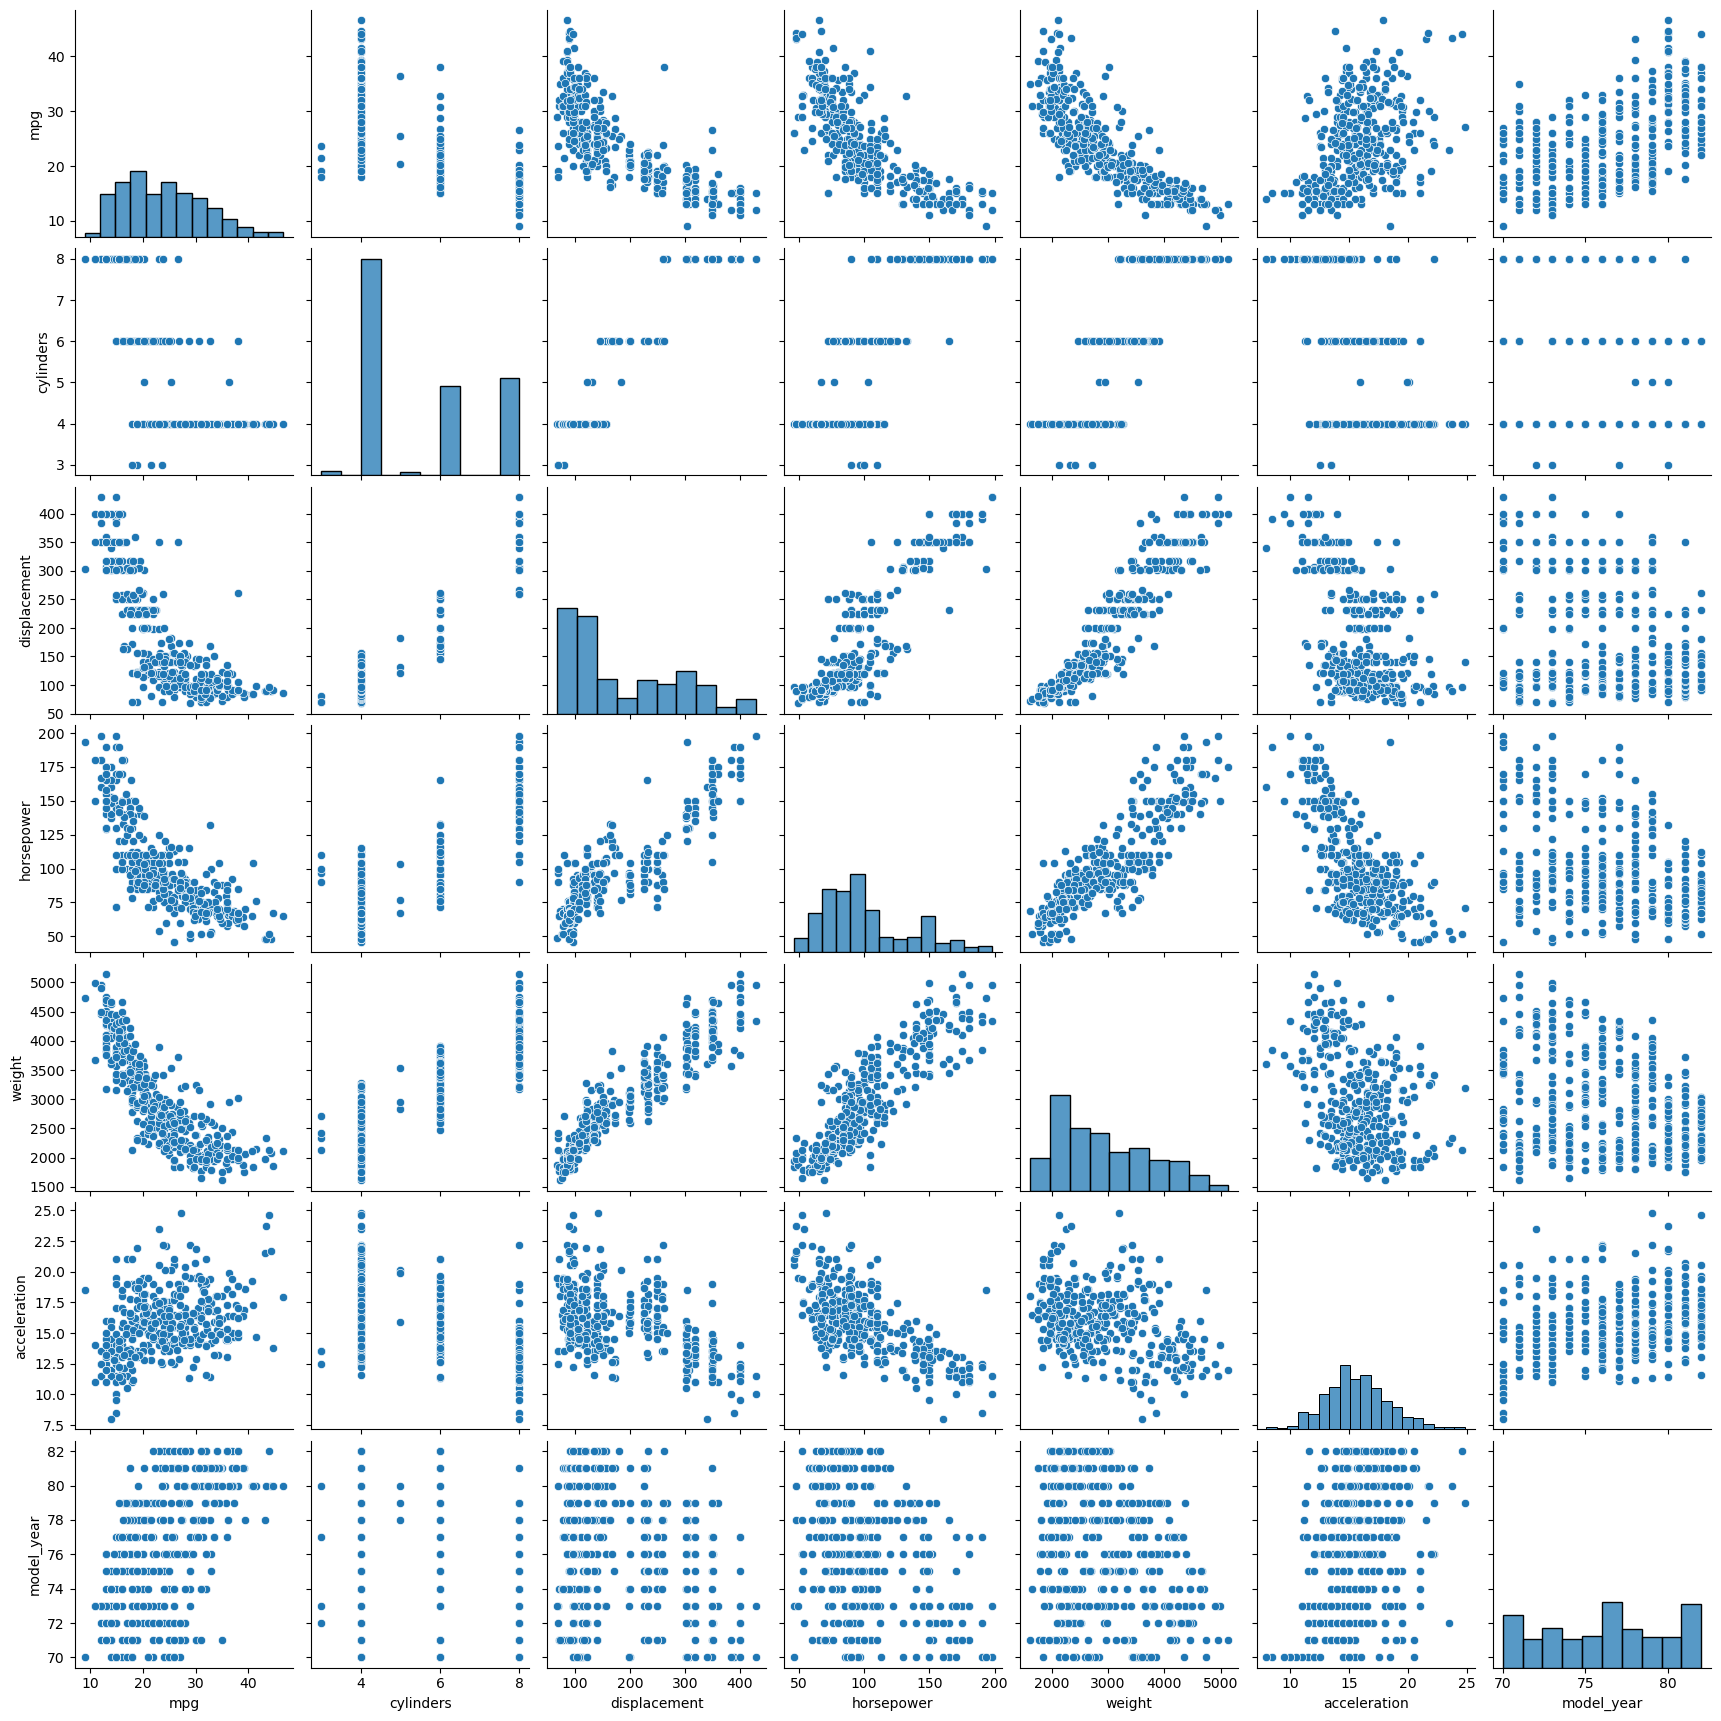

In [39]:
sns.pairplot(df[num])